# Beverage Sales Data Analysis
## Introduction
The goal of the project is to analyse simulated beverage sales data from Germany and Germany's internal regions. The data contains both business-to-business (B2B) sales and business-to-customer (B2C) sales. However, this project will only analyse B2C sales.

The project will scope, analyse, clean, and plot the data before explaining the findings from the analysis.

The project aims to provide insights into the following questions:

- Is there a correlation between discount and the amount of beverages sold in a single order?
- Is there a correlation between price and the amount of drinks bought in a single order?
- What are the most popular drinks and type of drinks?
- How have drink sales changed over time?

**Data Source:**

`synthetic_beverage_sales_data.csv` was sourced from [kaggle.com](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales).

**Things To Do:**
- Write an Analysis
- Explain Each Step
- Conclusions
- Clean Up
- Post on GitHub
- Add GitHub Repository to CV

## Import Python Modules

Firstly, we should import the modules that we will likely need for this project:

In [4]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In order to analysis the data, we can load the data into a `DataFrame` pandas object so that the data can be cleaned, minipulated, and plotted.

In [6]:
all_beverage_sales_data = pd.read_csv("synthetic_beverage_sales_data.csv")

In order to make the data easier to work with, we will make all the column names snake_case.

In [8]:
print("The columns names of the data are:")
for column_name in list(all_beverage_sales_data.columns):
    print(column_name)

The columns names of the data are:
Order_ID
Customer_ID
Customer_Type
Product
Category
Unit_Price
Quantity
Discount
Total_Price
Region
Order_Date


In [9]:
old_column_names = list(all_beverage_sales_data.columns)
new_column_names = [column.lower() for column in old_column_names]
rename_dict = {}
for i in range(len(old_column_names)):
    rename_dict[old_column_names[i]] = new_column_names[i]
all_beverage_sales_data.rename(columns=rename_dict, inplace=True)

print("The new columns names of the data are:")
for column_name in list(all_beverage_sales_data.columns):
    print(column_name)

The new columns names of the data are:
order_id
customer_id
customer_type
product
category
unit_price
quantity
discount
total_price
region
order_date


Since we only want to deal with the B2C sales only, we should shrink the data frame so it only contains those B2C observations.

In [11]:
print(all_beverage_sales_data.customer_type.value_counts())
print(all_beverage_sales_data.info(show_counts=True))

customer_type
B2C    5795405
B2B    3204505
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   order_id       8999910 non-null  object 
 1   customer_id    8999910 non-null  object 
 2   customer_type  8999910 non-null  object 
 3   product        8999910 non-null  object 
 4   category       8999910 non-null  object 
 5   unit_price     8999910 non-null  float64
 6   quantity       8999910 non-null  int64  
 7   discount       8999910 non-null  float64
 8   total_price    8999910 non-null  float64
 9   region         8999910 non-null  object 
 10  order_date     8999910 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None


In [12]:
beverage_sales = all_beverage_sales_data.loc[all_beverage_sales_data.customer_type == "B2C"].reset_index()
beverage_sales.drop(columns=["customer_type", "index"], inplace=True)
beverage_sales.head()

,order_id,customer_id,product,category,unit_price,quantity,discount,total_price,region,order_date
0,ORD2,CUS2847,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.0,18.18,Schleswig-Holstein,2023-03-16
1,ORD4,CUS2275,Mountain Dew,Soft Drinks,0.99,11,0.0,10.89,Bayern,2023-11-05
2,ORD7,CUS9366,Vio Wasser,Water,1.61,13,0.0,20.93,Baden-Württemberg,2021-01-12
3,ORD7,CUS9366,Rauch Multivitamin,Juices,2.31,7,0.0,16.17,Baden-Württemberg,2021-01-12
4,ORD8,CUS6944,Granini Apple,Juices,1.64,2,0.0,3.28,Schleswig-Holstein,2022-12-03


In [13]:
beverage_sales.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795405 entries, 0 to 5795404
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   order_id     5795405 non-null  object 
 1   customer_id  5795405 non-null  object 
 2   product      5795405 non-null  object 
 3   category     5795405 non-null  object 
 4   unit_price   5795405 non-null  float64
 5   quantity     5795405 non-null  int64  
 6   discount     5795405 non-null  float64
 7   total_price  5795405 non-null  float64
 8   region       5795405 non-null  object 
 9   order_date   5795405 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 442.2+ MB


We now have all the variables that provide information and all the B2C observations in our data. Therefore, it looks clean and ready to begin analysing.

## Analysis

In [15]:
category_colors = {
    "Alcoholic Beverages": "Black",
    "Juices": "Orange",
    "Water": "Blue",
    "Soft Drinks": "Red"
}

In [16]:
def aggregate_plot_by_variables(
    groupby_vars: list, 
    agg_var: str, 
    agg_fun: str,
    dframe=beverage_sales
) -> pd.DataFrame:
    
    """
    Reshapes the beverage_sales DataFrame with groupby and a pandas aggregate function on one of the variables of beverage_sales.

    Inputs:
        groupby_vars: list of str
        agg_var: str
        agg_fun: str

    Returns:
        df (reshaped): pandas.DataFrame
    """
    if not isinstance(groupby_vars, list) or not isinstance(agg_var, str) or not isinstance(agg_fun, str):
        raise TypeError("groupby_vars, agg_var, or agg_fun is not the correct object type")
        
    df = (
        dframe
        .groupby(groupby_vars)
        .agg(aggregate=(agg_var, agg_fun))
        .sort_values(by="aggregate", ascending=False)
        .reset_index()
    )

    aggregate_var_name = f"{agg_var}_{agg_fun}"
    df.rename(columns={"aggregate": aggregate_var_name}, inplace=True)

    return df

In [17]:
def create_bar_plot(
    title: str,
    df: pd.DataFrame, 
    x_vals: str, 
    y_vals: str,
    size=(12,8),
    hue_vals="category", 
    vertical_labels=False,
    bar_labels=False
) -> None:

    """
    
    """
    
    plt.figure(figsize=size)
    ax = plt.subplot()
    
    if hue_vals == "category":
        sns.barplot(data=df, x=x_vals, y=y_vals, hue=hue_vals, palette=category_colors)
    else:
        sns.barplot(data=df, x=x_vals, y=y_vals, hue=hue_vals)

    plt.title(title)

    title_format = lambda string: (
        " ".join(string.split("_")).title()
    )

    plt.xlabel(title_format(x_vals))
    plt.ylabel(title_format(y_vals))

    if vertical_labels:
        plt.xticks(rotation="vertical", fontsize=7)

    if bar_labels:
        for i in range(len(df)):
            ax.bar_label(ax.containers[i])

    plt.show()
    plt.clf()

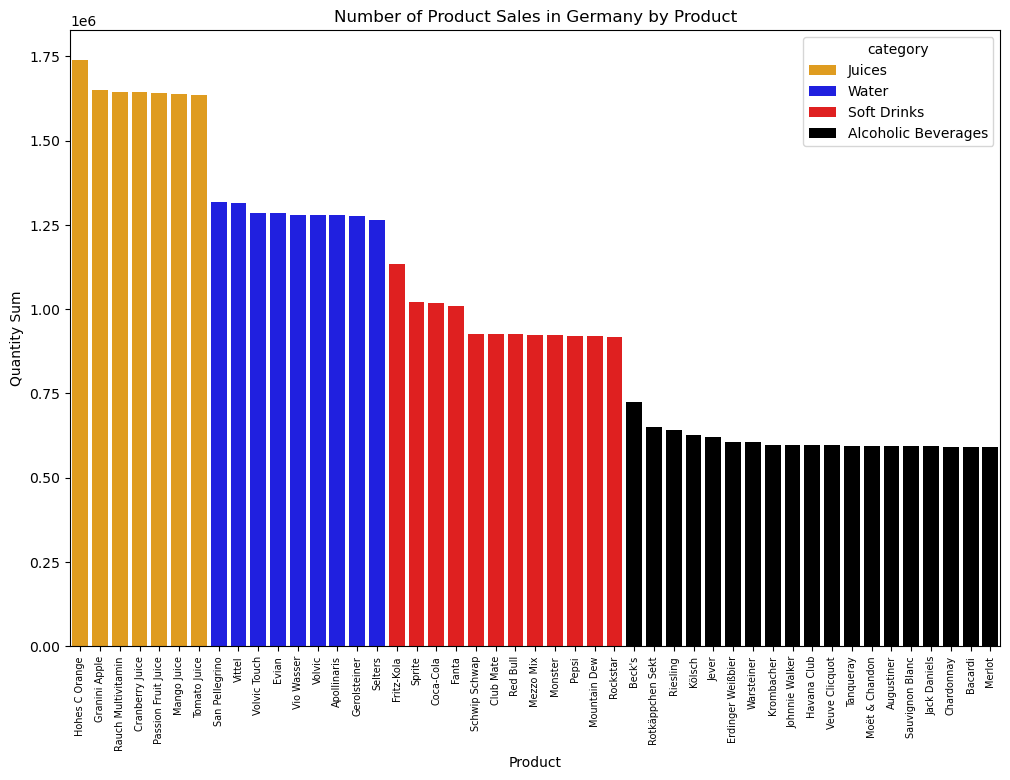

<Figure size 640x480 with 0 Axes>

In [18]:
product_sales = aggregate_plot_by_variables(["product", "category"], "quantity", "sum")
create_bar_plot(
    title = "Number of Product Sales in Germany by Product",
    df = product_sales,
    x_vals = "product",
    y_vals = "quantity_sum",
    vertical_labels=True
)

The above figure shows that the best selling product in Germany is 'Hohes C Orange' while the least selling product in Germany is 'Merlot'. Moreover, the figure also shows that juices congregate at the beginning of the figure, indicating that juice is the most sold beverage category in Germany. Alcohol congregates at the end of the figure, indicating that it is the least sold beverage category in Germany. Furthermore, note soda and water mostly mix amongst themselves in the middle of the figure.

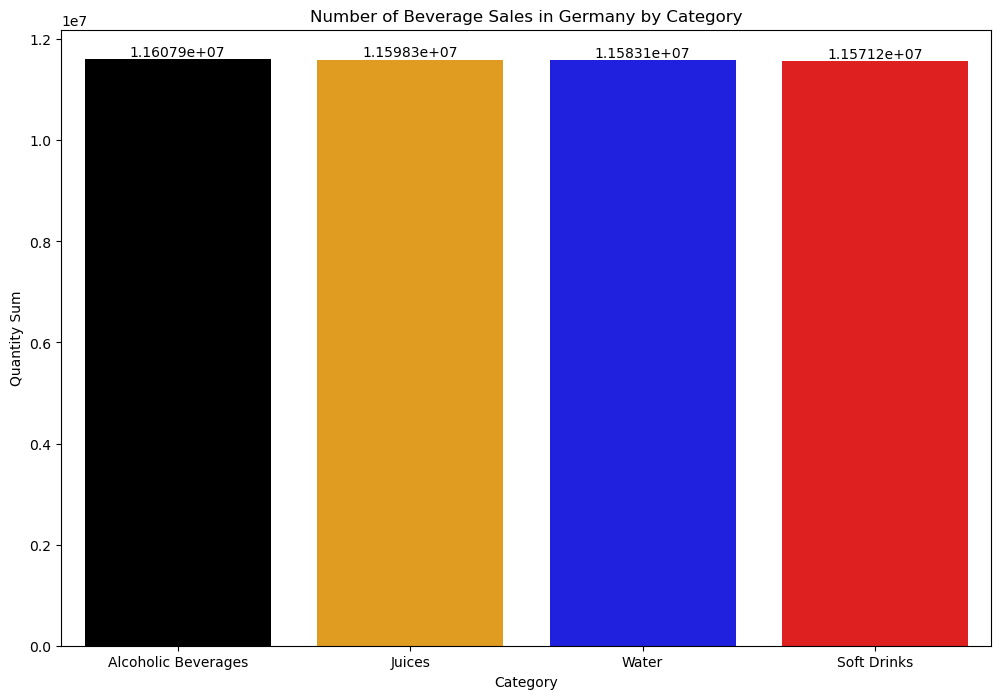

<Figure size 640x480 with 0 Axes>

In [20]:
category_sales = aggregate_plot_by_variables(["category"], "quantity", "sum")
create_bar_plot(
    title = "Number of Beverage Sales in Germany by Category",
    df = category_sales,
    x_vals = "category",
    y_vals = "quantity_sum",
    bar_labels=True
)

The above figure shows that all beverage categories sell very similar quantities of beverages. This is suprising considering our "Number of Product Sales in Germany" figure where the individual products in the categories of beverages congregate at specific areas of the figure. Therefore, a possible reason for this could be that there are different amounts of drinks in each category. Let's investigate this now. 

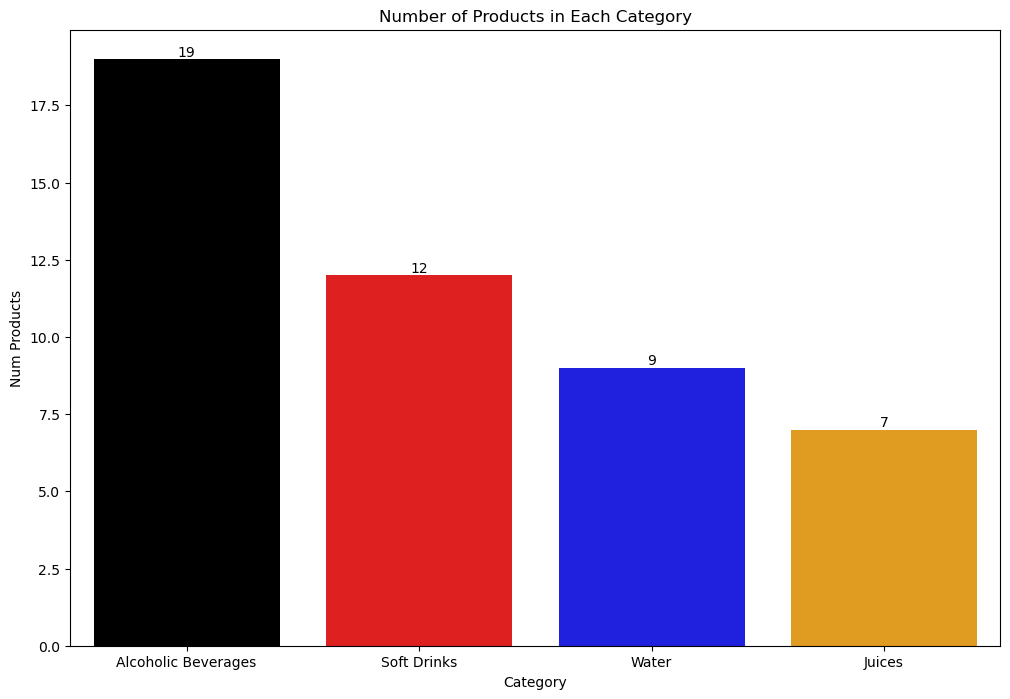

<Figure size 640x480 with 0 Axes>

In [22]:
category_product_num = aggregate_plot_by_variables(["category"], "product", "nunique")
category_product_num.rename(columns={"product_nunique": "num_products"}, inplace=True)
create_bar_plot(
    title = "Number of Products in Each Category",
    df = category_product_num,
    x_vals = "category",
    y_vals = "num_products",
    bar_labels = True
)

Therefore, the figure shows us that the reason individual juices get sold the most is because it is the least competitive market. While the oppisite is true for alcohol beverages. Therefore, if a business wanted to get the most sales on a new beverage product, the business should make that new product a juice. However, does that mean you would make the most money off an individual juice product.

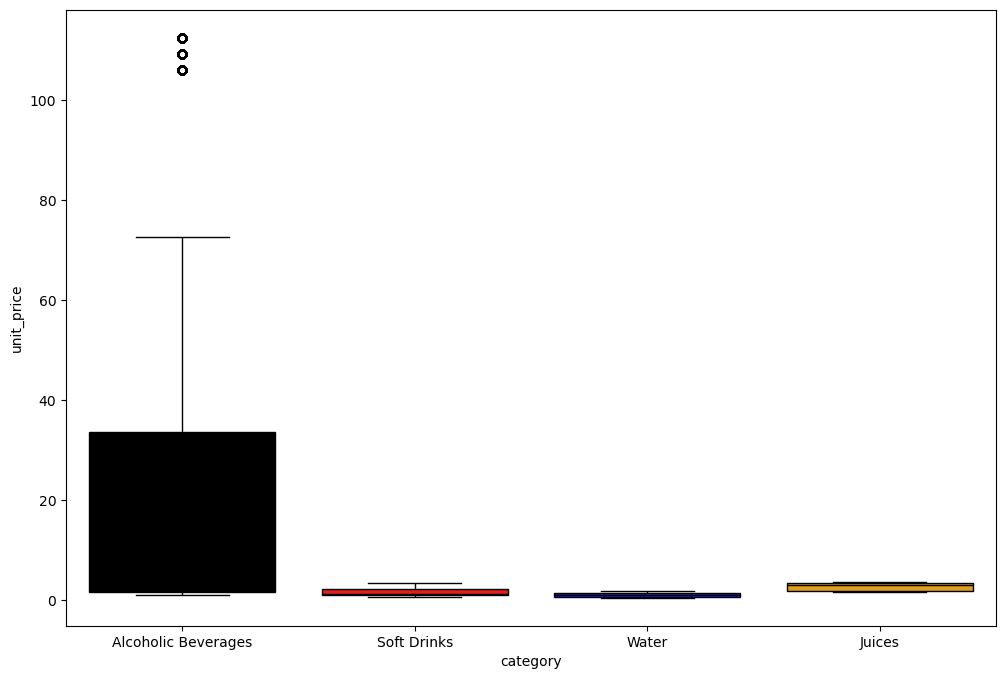

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data = beverage_sales,
    x = "category",
    y = "unit_price",
    hue = "category",
    palette = category_colors
)
plt.show()
plt.clf()

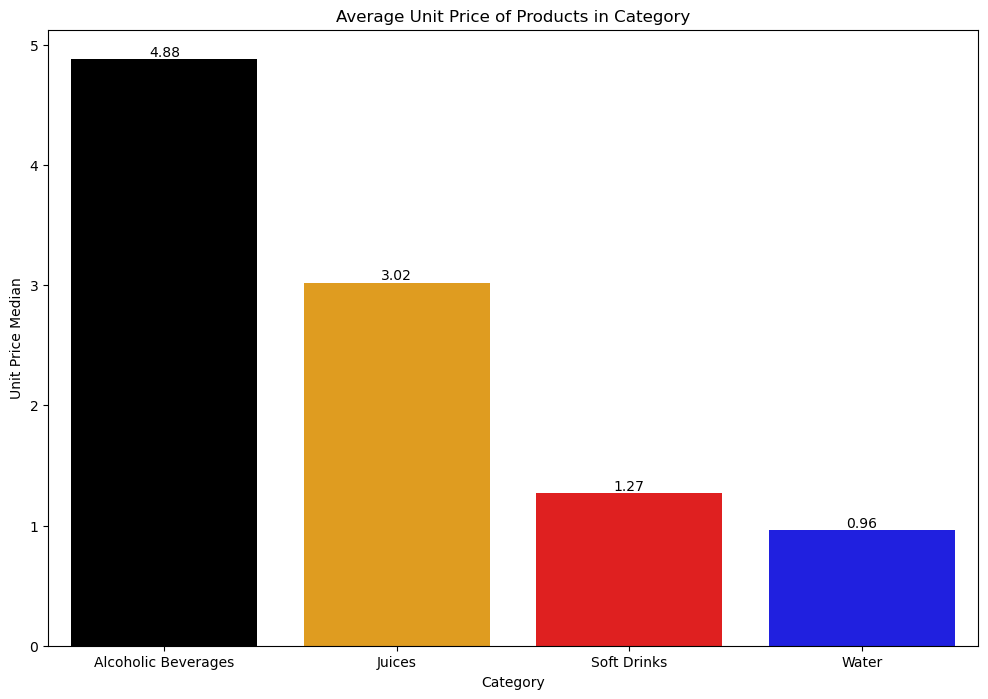

<Figure size 640x480 with 0 Axes>

In [25]:
category_average_price = aggregate_plot_by_variables(["category"], "unit_price", "median")
create_bar_plot(
    title = "Average Unit Price of Products in Category",
    df = category_average_price,
    x_vals = "category",
    y_vals = "unit_price_median",
    bar_labels = True
)

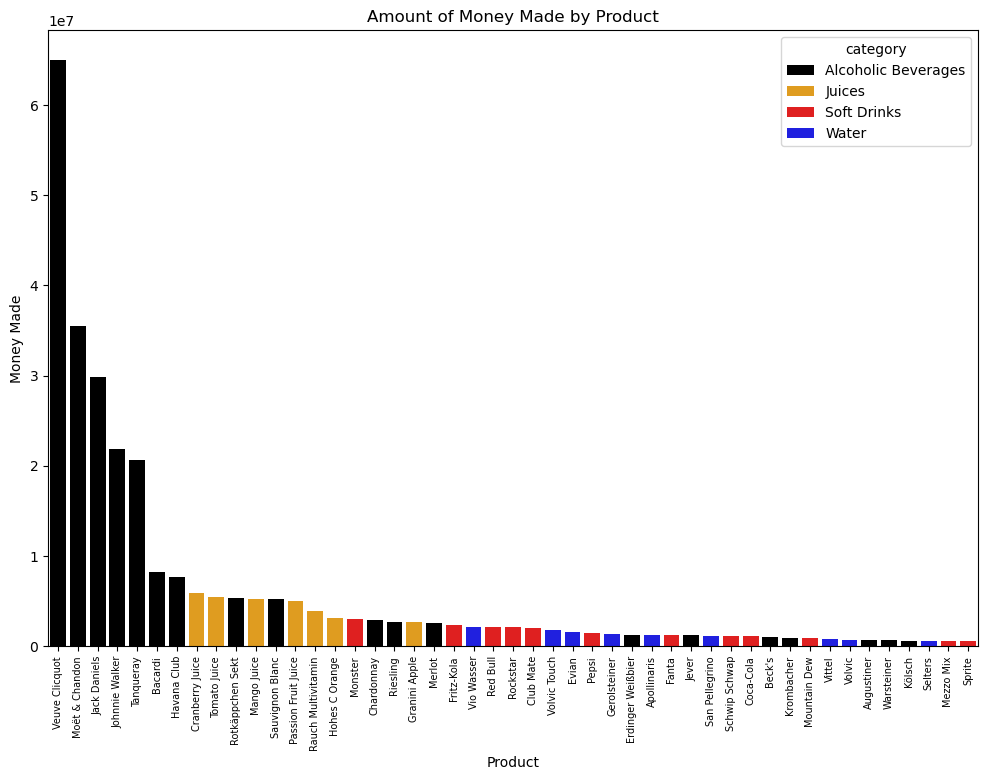

<Figure size 640x480 with 0 Axes>

In [26]:
product_total_price_sum = aggregate_plot_by_variables(["product", "category"], "total_price", "sum") 
product_total_price_sum.rename(columns={"total_price_sum": "money_made"}, inplace=True)
create_bar_plot(
    title = "Amount of Money Made by Product",
    df = product_total_price_sum,
    x_vals = "product",
    y_vals = "money_made",
    vertical_labels=True
)

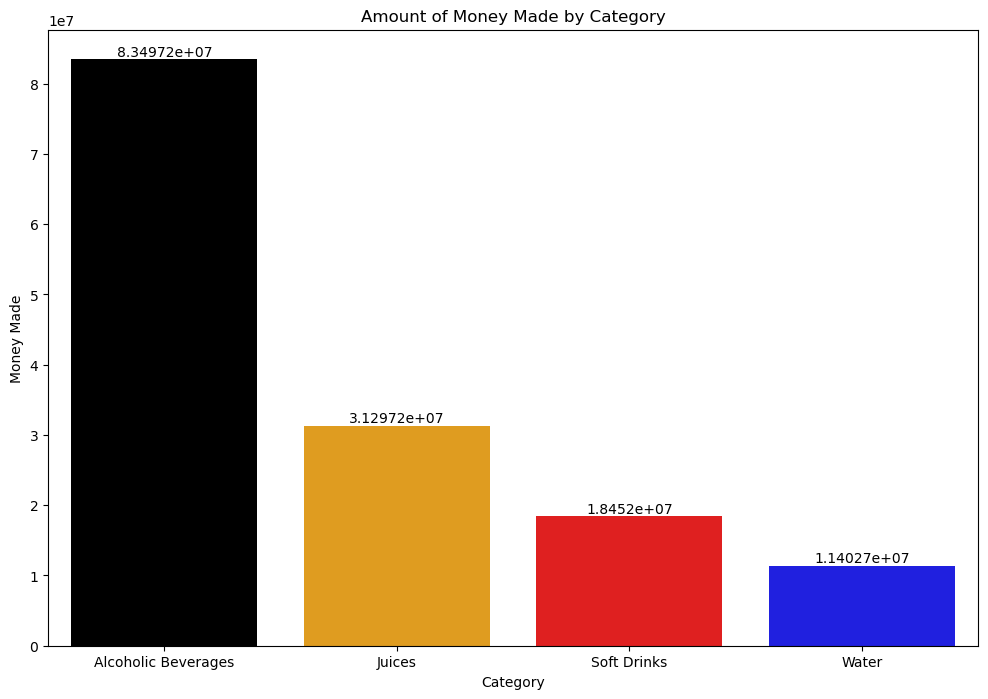

<Figure size 640x480 with 0 Axes>

In [34]:
product_total_price_sum_no_outliers = product_total_price_sum[product_total_price_sum.money_made < 25000000]
category_total_price_sum = aggregate_plot_by_variables(["category"], "money_made", "sum", dframe=product_total_price_sum_no_outliers) 
category_total_price_sum.rename(columns={"money_made_sum": "money_made"}, inplace=True)
create_bar_plot(
    title = "Amount of Money Made by Category",
    df = category_total_price_sum,
    x_vals = "category",
    y_vals = "money_made",
    bar_labels = True
)